<a href="https://colab.research.google.com/github/tefarov/netology_pyda5/blob/master/homework_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

from pylab import rcParams
rcParams['figure.figsize'] = 20,9

# Задание 1
Построить 5 графиков по выбранным данным. <br>
Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. <br>
Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [2]:
pth = '/content/drive/My Drive/EDU.Netology/Seasons_Stats.csv'
mov_df = pd.read_csv(pth)
mov_df = mov_df[['Tm','Year','Pos','Player','Age','2P','2PA','2P%','3P','3PA','3P%']]

mov_df = mov_df.loc[mov_df.Year.notna()].loc[mov_df.Age.notna()]

mov_df['Year'] = mov_df.Year.astype('int64')
mov_df[ 'Age'] = mov_df.Age.astype('int64')

print(mov_df.dtypes)

Tm         object
Year        int64
Pos        object
Player     object
Age         int64
2P        float64
2PA       float64
2P%       float64
3P        float64
3PA       float64
3P%       float64
dtype: object


## График 1
Исследуем изменение результативности двух- и трёхочковых бросков в динамике за последние 50 лет. Выбрана линейная диаграмма, потому что она наиболее наглядно отображает изменение одного фактоора во времени. В визуализации учатсвуют переменные года (int64) и результативность (float)

По данному графику видно, что со временем наблюдается рост результативности двухочковых бросков, и особенно трёхочковых.

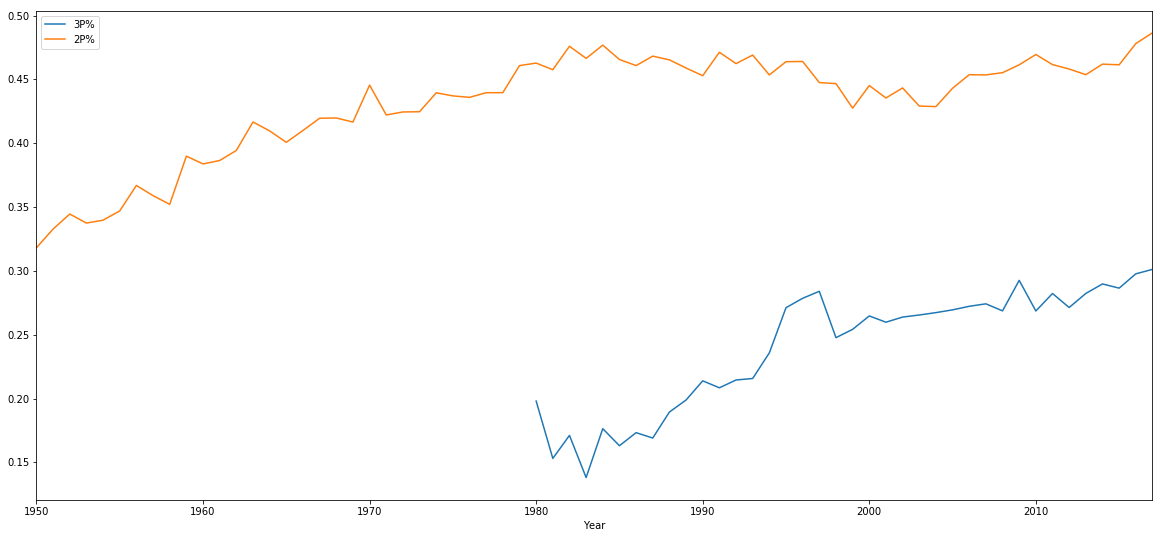

In [3]:
grp_df = mov_df[['Year','3P%','2P%']].groupby('Year').mean()
grp_df.plot()

## График 2
Исследуем зависимость среднего количества бросков в зависимости от возраста игрока.
Выбрана столбчатая гистограмма т.к. большое количество столбцов легче считывается, чем больое количество строк. В визуализации учатсвуют переменные возраст (int64) и колиечство двухочковых бросков (float)

Из данного графика можно сделать вывод, что с возрастом игроки совершают меньше двухочковых бросков

<BarContainer object of 27 artists>

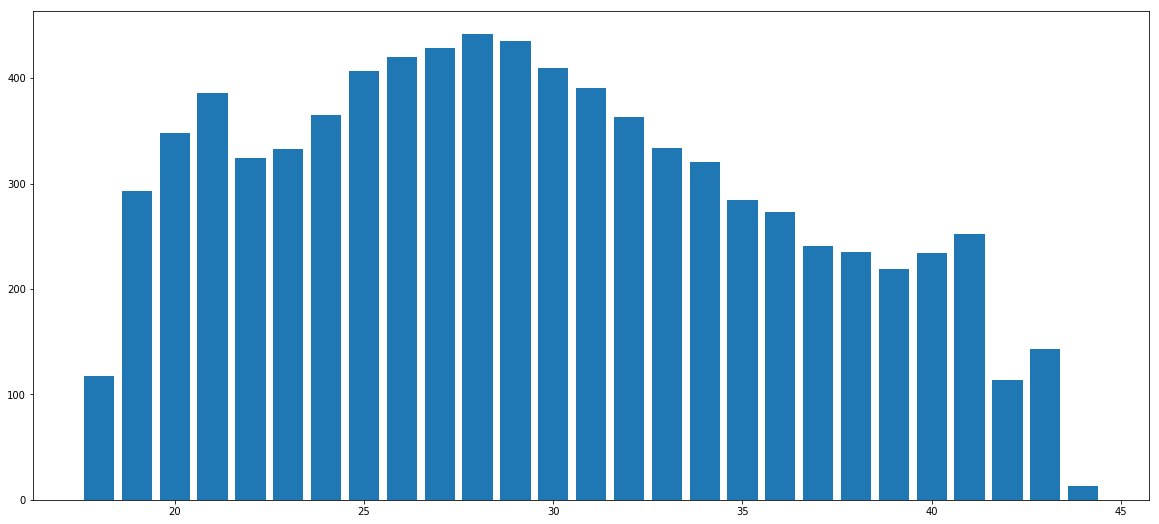

In [4]:
grp_df = mov_df[['Age','2PA','3PA']].groupby('Age',as_index=False).mean()
plt.bar(grp_df['Age'],grp_df['2PA'])

## График 3
Исследуем команды с наивысшей точностью трёхочковых бросков. Выбрана горизонтальная диаграмма поскольку результаты отличаются незначительно, и в горизонтальном выражении отличия будут более заметны. В визуализации учатсвуют переменные название команды (object/str) и результативность (float)

<BarContainer object of 10 artists>

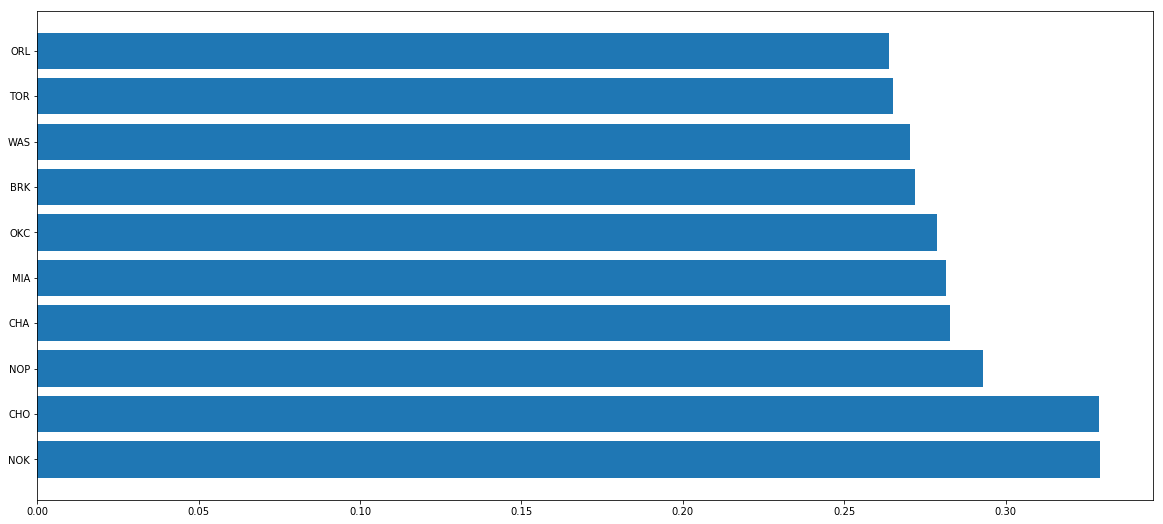

In [5]:
grp_df = mov_df[['Tm','2P%','3P%']].groupby('Tm',as_index=False).mean().sort_values('3P%',ascending=False).head(10)
plt.barh(grp_df['Tm'],grp_df['3P%'])

## График 4
Иссследуем взаимосвязь точности трёхочковых бросков и и их количества. Для наглядной визуализации взаимосвязи наиболее подходит двумерная диаграмма поскольку позволяет оценить всё поле комбинаций и выявить доминирующие зависимости, а также увидеть наиболее часто встречающиеся события. В визуализации учатсвуют переменные количество трёхочковых бросков (float) и результативность трёхочковых бросков (float)

Исходя из графика можно сделать вывод, что наибольшее количество игроков совершают малое количество бросков, со средней точностью и ниже. Наибольше количество трёхочковых бросков совершают игроки со средней точностью попадания. Можно также обратить внимание на то, что есть кластер игроков с высокой точностью трёхочковых бросков, и малым количеством этих бросков.

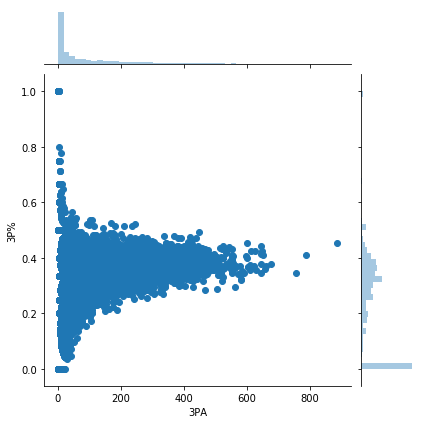

In [6]:
grp_df = mov_df[['3PA','3P%']]
sns.jointplot(x='3PA',y='3P%',data=grp_df)

## График 5
Исследуем возрастную структуру игроков. Для исследования выбарана тепловая карта, потому что позволяет наглядно оценить вляиние двух числовых факторов на исследуемый показатель. В визуализации учатсвуют переменные года (int64), возраста игрока (int64) и количество игроков (float)

По представленным данным можно сделать выводы:
1. число игроков растёт, наибольшее количество игроков в возрасте от 22 до 28 лет
2. со временем максимально возможная карьера игрока увеличилась с 12 лет до 20, т.к. выросли как нижняя так и верхняя граница возраста игроков



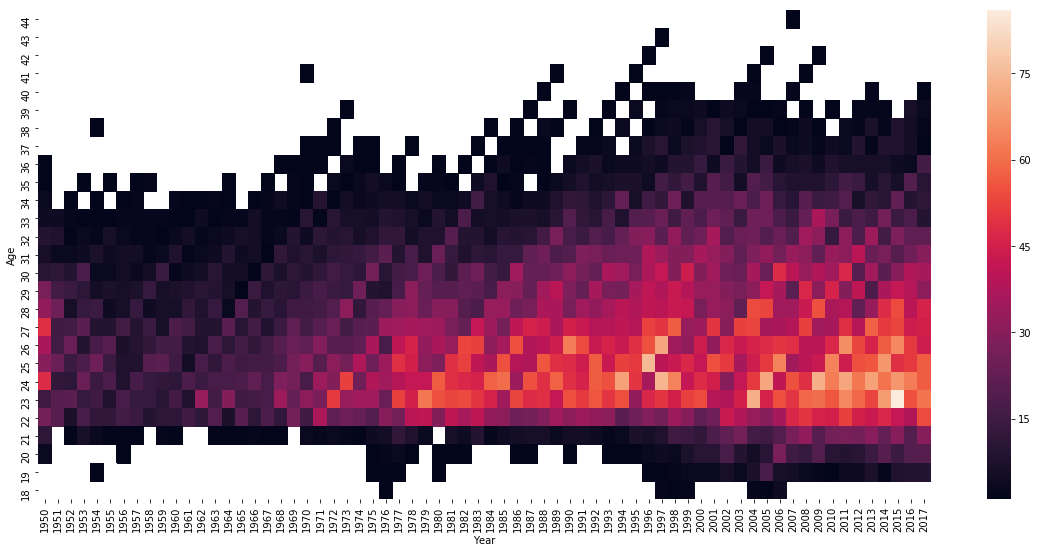

In [7]:
grp_df = mov_df[['Year','Age','2P','2PA']].groupby(['Year','Age'],as_index=False).count()
#grp_df['2P%'] = grp_df['2P'] / grp_df['2PA']
grp_df = grp_df.pivot(columns='Year',index='Age',values='2P')
grp_df.sort_index(ascending=False,inplace=True)

sns.heatmap(grp_df,annot=False)